In [ ]:
token = ''

In [ ]:
##Get the Users from Bangalore and follower more than 100 and store it one DataFrame
user_df = pd.DataFrame()
for i in range(1,21):
  page =i
  !curl -L -H "Authorization: Bearer "$token \
  -H "Accept: application/vnd.github.v3+json" \
  "https://api.github.com/search/users?q=location:Bangalore+followers:>100&order=followers&page="$page> "test"$page".json"

  out = json.load(open(f'test{page}.json'))
  temp = pd.DataFrame(out['items'])
  user_df = pd.concat([user_df,temp])



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34393  100 34393    0     0   110k      0 --:--:-- --:--:-- --:--:--  111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34277  100 34277    0     0   114k      0 --:--:-- --:--:-- --:--:--  114k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34543  100 34543    0     0   115k      0 --:--:-- --:--:-- --:--:--  115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34611  100 34611    0     0   121k      0 --:--:-- --:--:-- --:--:--  121k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:

## For each user retrived from above, get the user details using another api and stored it in Dataframe
user_id_list = list(user_df['login'])
users_submit_df = pd.DataFrame()
##Now call second api to get the user details for each user from user id list
for user in user_id_list:
  !curl -L -H "Authorization: Bearer "$token \
  -H "Accept: application/vnd.github.v3+json" \
  "https://api.github.com/users/"$user> "user_details.json"

  out = json.load(open(f'user_details.json'))
  temp = pd.DataFrame(out,index=[0])
  users_submit_df = pd.concat([users_submit_df,temp])

##Filter out the required columns
users_submit_df = users_submit_df[['login','name','company','location','email','hireable','bio','public_repos','followers','following','created_at']]
users_submit_df.to_csv('users_submit.csv',index = False)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1497  100  1497    0     0   6827      0 --:--:-- --:--:-- --:--:--  6835
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1666  100  1666    0     0   8981      0 --:--:-- --:--:-- --:--:--  8956
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1499  100  1499    0     0   7154      0 --:--:-- --:--:-- --:--:--  7172
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1582  100  1582    0     0   6936      0 --:--:-- --:--:-- --:--:--  6969
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
## Filter the columns as mentioned in the Project
users_submit_df = users_submit_df[['login','name','company','location','email','hireable','bio','public_repos','followers','following','created_at']]

In [5]:
##q1
list(users_submit_df.sort_values(by='followers',ascending=False).head(5)['login'])

['krishnaik06',
 'championswimmer',
 'arpitbbhayani',
 'manjunath5496',
 'tanaypratap']

In [6]:
##q2
users_submit_df['created_at'] = pd.to_datetime(users_submit_df['created_at'])
users_submit_df.sort_values(by='created_at',ascending=True).head(5)[['login','created_at']]

,login,created_at
37,anandology,2008-04-16 14:03:15+00:00
355,irfn,2008-04-18 06:22:48+00:00
91,jace,2008-09-29 05:31:56+00:00
111,abhisek,2008-10-30 13:46:45+00:00
444,abhin4v,2008-11-12 20:08:22+00:00


In [ ]:
users_submit_df.to_csv('users.csv',index = False)

In [7]:
# Trim white spaces from company column and remove leading @ and make upper cases

users_submit_df['company'] = users_submit_df['company'].str.strip()
users_submit_df['company'] = users_submit_df['company'].str.replace(r'^@', '', regex=True)
users_submit_df['company'] = users_submit_df['company'].str.upper()

In [8]:
##q4
users_submit_df.company.value_counts()[:4]

,count
company,
GOOGLE,14
MICROSOFT,9
MASAI SCHOOL,8
RAZORPAY,7


In [ ]:
users_submit_df.to_csv('users.csv',index = False)

In [ ]:
##code to create repository

In [ ]:
## For each stored in datframe get the details of most recent 500 repo and stored it in Dataframe

import requests
import pandas as pd
import json
from tqdm import tqdm

# Replace with your personal access token
headers = {"Authorization": f"token {token}", "Accept": "application/vnd.github.v3+json"}

user_list =  list(users_submit_df['login'].values)
repo_all_user_df = pd.DataFrame()
for user in tqdm(user_list):
  flag =  True
  repo_user_df = pd.DataFrame()
  page =1
  while flag:
    try:
      url = f"https://api.github.com/users/{user}/repos?page={page}&sort=pushed"

      response = requests.get(url, headers=headers)
      if len(response.json()) == 0:
        flag = False
        page =1
      response.raise_for_status()  # Raise an exception for bad status codes

      repos = response.json()
      temp_repo = pd.DataFrame(repos)
      repo_user_df = pd.concat([repo_user_df,temp_repo])
      page += 1
      if len(repo_user_df)>= 500:
        repo_user_df = repo_user_df.iloc[:500,:]
        break
    except requests.exceptions.RequestException as e:
      print(f"An error occurred: {e}")
      flag = False
      page =1
    repo_all_user_df = pd.concat([repo_all_user_df,repo_user_df])
repo_all_user_df.to_csv('repositories.csv',index = False)


100%|██████████| 589/589 [37:31<00:00,  3.82s/it]


In [10]:
# # Filter the columns as needed in project
repo_all_user_df = repo_all_user_df[['owner','full_name','created_at','stargazers_count','watchers_count','language','has_projects','has_wiki','license']]

In [ ]:
repo_all_user_df.to_csv('repositories.csv',index = False)

In [ ]:
df = pd.read_csv('repositories.csv')

In [1]:
## Get the owner and license details
import re
df['owner'] =df['owner'].apply(lambda x: re.sub(r'id.*', '', str(x))).replace("{'login': '",'',regex =  True).replace("', '",'',regex =  True)

df['license'] = df['license'].apply(lambda x: re.sub(r", 'name.*", '', str(x))).apply(lambda x: re.sub(r"^.*?'key': ", '', str(x))).str.replace("'",'',regex = True)

In [ ]:
df.rename(columns = {'owner':'login','license': 'license_name'},inplace = True)

In [ ]:
df.head(2)

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,krishnaik06,krishnaik06/Transformers-Materials,2024-10-19T15:43:30Z,5,5,NaN,True,True,gpl-3.0
1,krishnaik06,krishnaik06/ETLWeather,2024-10-15T10:45:09Z,8,8,Python,True,True,gpl-3.0


In [ ]:
df.to_csv('repositories.csv',index =  False)

In [ ]:
df[~df.license_name.isna()]['license_name'].value_counts()

,count
license_name,
mit,47719
apache-2.0,17851
other,10785
gpl-3.0,7479
bsd-3-clause,2818
gpl-2.0,1440
cc0-1.0,1404
agpl-3.0,1320
mpl-2.0,946


In [11]:
##q3
df.license_name.value_counts()

,count
license_name,
mit,47719
apache-2.0,17851
other,10785
gpl-3.0,7479
bsd-3-clause,2818
gpl-2.0,1440
cc0-1.0,1404
agpl-3.0,1320
mpl-2.0,946


In [ ]:
##q5
df.language.value_counts()[:4]


,count
language,
JavaScript,37642
Python,21127
HTML,14662
Java,11316


In [12]:
#q6
comb_df = pd.merge(df,users_submit_df,how='left',on='login')
# comb_df.shape

In [13]:
comb_df[comb_df['created_at_y'].dt.year>2020].language.value_counts()[:4]

,count
language,
CSS,3299
JavaScript,3059
HTML,1726
TypeScript,337


In [ ]:
#q7
df.pivot_table(index='language',values='stargazers_count',aggfunc='mean').sort_values(by='stargazers_count',ascending=False)[:10]

,stargazers_count
language,
XSLT,151.235294
TypeScript,101.180052
Pascal,92.000000
Rust,84.908104
SCSS,66.230530
Elixir,37.514377
TSQL,31.969072
Nix,30.907514
Emacs Lisp,29.333333


In [ ]:
df.columns

Index(['login', 'full_name', 'created_at', 'stargazers_count',
       'watchers_count', 'language', 'has_projects', 'has_wiki',
       'license_name'],
      dtype='object')

In [14]:
#q8

users_submit_df['leader_strength'] = users_submit_df.apply(lambda x: x['followers'] /(1+x['following']),axis=1)
users_submit_df.sort_values(by='leader_strength',ascending=False).head(5)[['login','leader_strength']]

,login,leader_strength
0,krishnaik06,30808.0
6,Hack-with-Github,2955.0
14,laxmimerit,1660.0
4,tanaypratap,1514.5
17,abhishh1,1464.0


In [15]:
#q9
users_submit_df[['followers','public_repos']].corr()


,followers,public_repos
followers,1.000000,0.191183
public_repos,0.191183,1.000000


In [16]:
#q10
from sklearn.linear_model import LinearRegression

q10 = users_submit_df[['followers','public_repos']]

y = q10[['followers']]
X = q10[['public_repos']]

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
model.coef_

array([[2.34107086]])

In [30]:
df['projects_wikki_enabled_toge'] = df.apply(lambda x: x['has_projects'] and x['has_wiki'],axis=1)
df['projects_wikki_enabled_loose'] = df.apply(lambda x: x['has_projects'] or x['has_wiki'],axis=1)

In [31]:
df[['projects_wikki_enabled_toge','projects_wikki_enabled_loose']].corr()

,projects_wikki_enabled_toge,projects_wikki_enabled_loose
projects_wikki_enabled_toge,1.00000,0.23004
projects_wikki_enabled_loose,0.23004,1.00000


In [18]:
#q11

df[['has_projects','has_wiki']].corr()

,has_projects,has_wiki
has_projects,1.000000,0.205802
has_wiki,0.205802,1.000000


In [26]:
df[(df['has_projects'] == True) | (df['has_wiki'] == True)][['has_projects','has_wiki']].corr()

,has_projects,has_wiki
has_projects,1.000000,-0.011545
has_wiki,-0.011545,1.000000


In [ ]:
df['has_projects'].value_counts()

,count
has_projects,
True,222583
False,1623


In [ ]:
df['has_wiki'].value_counts()

,count
has_wiki,
True,201581
False,22625


In [ ]:
df[ (df['has_wiki'] == True)][['has_projects',]].value_counts()

,count
has_projects,
True,201300
False,281


In [ ]:
# prompt: Correlation between projects and wiki enabled

correlation = df[['has_projects', 'has_wiki']].corr()
correlation

,has_projects,has_wiki
has_projects,1.000000,0.205802
has_wiki,0.205802,1.000000


In [ ]:
users_submit_df['hireable_upd'] = users_submit_df['hireable'].apply(lambda x: False if x!= True else True)
users_submit_df['hireable_upd']

,hireable_upd
0,False
0,True
0,True
0,False
0,False
...,...
0,False
0,True
0,False
0,False


In [ ]:
users_submit_df.pivot_table(index ='hireable_upd',values='following',aggfunc='mean')

,following
hireable_upd,
False,149.412121
True,213.548263


In [67]:
users_submit_df[users_submit_df['hireable'] == True].following.mean() - users_submit_df[users_submit_df['hireable'] != True].following.mean()

64.13614133614135

In [ ]:
users_submit_df[users_submit_df['hireable'] != True].following.sum()/ len(users_submit_df[users_submit_df['hireable'] != True])

149.4121212121212

In [ ]:
213.548263-149.412121

64.13614199999998

In [ ]:
#q12

users_submit_df[users_submit_df['hireable'] ==True].pivot_table(index = 'login',values='following',aggfunc='count')

,following
login,
7enTropy7,1
AdityaSoni19031997,1
AkhileshManda,1
AkshayaBalasubramani,1
AlphaDecodeX,1
...,...
vsjha18,1
vvHacker007,1
webtunings,1


In [32]:


import pandas as pd

# Calculate the length of the bio for each user
users_submit_df['bio_length'] = users_submit_df['bio'].str.split().str.len()

# Print the bio lengths
y = users_submit_df[~users_submit_df['bio_length'].isna()][['followers']]
x = users_submit_df[~users_submit_df['bio_length'].isna()][['bio_length']]

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
model.coef_

array([[0.33538421]])

In [33]:
##q 14

df['created_at'] = pd.to_datetime(df['created_at'])
df['weekdays'] = df['created_at'].dt.day_name()
# df['weekdays'].value_counts()

In [34]:
df[(df['weekdays']=='Saturday') |(df['weekdays']=='Sunday')].pivot_table(index='login',values='full_name',aggfunc='count').sort_values(by='full_name',ascending=False)

,full_name
login,
itaditya,1117
manjunath5496,1092
avinassh,998
sangam14,990
BastinRobin,903
...,...
kshitijmishra23,2
sreya-satheesh,2
shashankkumar,2


In [64]:

import numpy as np
users_submit_df['hireable'] = users_submit_df['hireable'].replace(np.nan, False)

<ipython-input-64-420defcd96ef>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  users_submit_df['hireable'] = users_submit_df['hireable'].replace(np.nan, False)


In [65]:
users_submit_df['hireable'].value_counts()

,count
hireable,
False,330
True,259


In [66]:
#q15

email_user = users_submit_df[users_submit_df['email'].notna()].shape[0]
x = users_submit_df[(users_submit_df['hireable']== True) & (users_submit_df['email'].notna())].shape[0]/email_user

y = users_submit_df[(users_submit_df['hireable']!= True) & (users_submit_df['email'].notna())].shape[0]/email_user

x-y

0.041176470588235314

In [ ]:
# q15

users_submit_df[(users_submit_df['hireable']== True   )& (users_submit_df['email'].notna())].shape[0]/users_submit_df.shape[0] - users_submit_df[(users_submit_df['hireable']!= True   )& (users_submit_df['email'].notna())].shape[0]/users_submit_df.shape[0]

0.02376910016977929

In [ ]:
users_submit_df[(users_submit_df['hireable']!= True   )& (users_submit_df['email'].notna())].shape[0]/users_submit_df.shape[0]

0.2767402376910017

In [ ]:
users_submit_df[users_submit_df['name'].isna()]

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,leader_strength
106,Noumanabegum,NaN,NaN,Bangalore,NaN,NaN,Aspiring Full Stack Developer,6,373,415,2022-12-17 09:27:55+00:00,0.896635
180,Irfanrida,NaN,NaN,Bangalore,NaN,NaN,NaN,1,264,3508,2019-07-08 07:47:28+00:00,0.075235
196,AnkitaBagale,NaN,RAZORPAY,Bangalore,NaN,NaN,Senior Frontend Engineer,44,250,4,2020-08-16 15:11:24+00:00,50.000000
206,arctutorials,NaN,ARC TUTORIALS,Bangalore,NaN,NaN,Official ARC Tutorials GitHub Page\r\nvisit ht...,14,235,0,2018-02-10 17:20:09+00:00,235.000000
271,Arun-purakkatt,NaN,NaN,Bangalore,NaN,NaN,Data Science|AI|Machine Learning|Deep Learning...,132,179,1744,2019-09-22 14:24:01+00:00,0.102579
376,deepakkapse,NaN,NaN,"Bangalore,India",NaN,NaN,Cloud Engineer | Passionate Learner | Loves to...,208,143,304,2018-07-11 13:13:22+00:00,0.468852


In [ ]:
#q16
users_submit_df['surname'] = users_submit_df[~users_submit_df['name'].isna()]['name'].apply(lambda x: x.split(' ')[-1] if x is not None  else '')
users_submit_df['surname'].value_counts()[:4]

,count
surname,
Kumar,21
Singh,21
Gupta,10
Mishra,7


In [44]:
name_df = users_submit_df[~users_submit_df['name'].isna()][['name']]
name_df['name']= name_df['name'].str.strip()
name_df['surname'] = name_df['name'].apply(lambda x: x.split(' ')[-1] if x is not None  else '')
name_df['first_name'] = name_df['name'].apply(lambda x: x.split(' ')[0] if x is not None  else '')

In [45]:
name_df['first_name'].value_counts()[:4]

,count
first_name,
Vivek,6
Aditya,5
Abhinav,5
Abhishek,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224206 entries, 0 to 224205
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   login             224206 non-null  object
 1   full_name         224206 non-null  object
 2   created_at        224206 non-null  object
 3   stargazers_count  224206 non-null  int64 
 4   watchers_count    224206 non-null  int64 
 5   language          152377 non-null  object
 6   has_projects      224206 non-null  bool  
 7   has_wiki          224206 non-null  bool  
 8   license_name      95933 non-null   object
dtypes: bool(2), int64(2), object(5)
memory usage: 12.4+ MB


In [63]:
import pandas as pd

users_submit_df = pd.read_csv('users.csv')
df = pd.read_csv('repositories.csv')

In [4]:
users_submit_df.head(2)

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,NaN,Data Scientist with ML and Deep Learning expe...,329,30808,0,2016-06-20T09:25:45Z
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,True,Director of Engineering - @JioCinema ┃\r\nPast...,351,4660,29,2012-01-13T07:41:40Z


In [71]:
from collections import Counter
import string
import nltk
import numpy as np
import pandas as pd

In [85]:

users_submit_df['bio'] = users_submit_df['bio'].astype(str).fillna('')
users_submit_df['bio'] = users_submit_df['bio'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

In [87]:
users_submit_df['bio'] = users_submit_df['bio'].str.lower()

bio =  list(users_submit_df['bio'].values)
bio_break = [nltk.tokenize.wordpunct_tokenize(text) for text in bio ]

In [89]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [90]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# Add numbers
punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

In [91]:
bio_clear = comment_raiz(bio_break)

In [93]:
def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

In [95]:
bio_count = counter(bio_clear)

In [96]:
bio_count.most_common(10)

[('develop', 158),
 ('engin', 117),
 ('nan', 92),
 ('softw', 77),
 ('stack', 50),
 ('learn', 47),
 ('web', 45),
 ('ful', 44),
 ('build', 40),
 ('dat', 39)]

In [106]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['week'] = df['created_at'].dt.weekday

<Axes: >

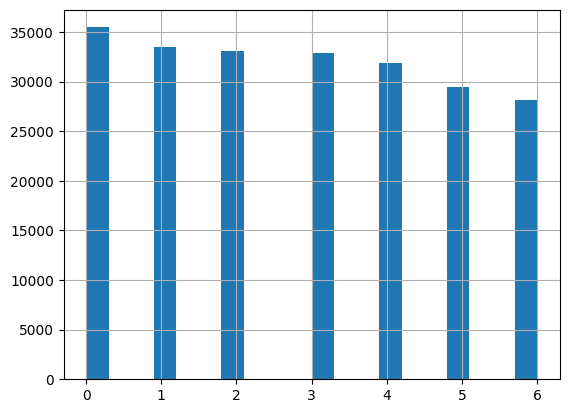

In [107]:
df['week'].hist(bins =20)